## Convolutional Neural Networks (CNN)
<p style="font-size:20px;">In this notebook, CNN will be used to classify images of cats and dogs. The training dataset is comparatively small and causes an issue of overfitting. Image Augmentation is used to enhance the model and avoid overfitting.The notebook is organizsed as follows:</p>

<ol style="font-size:20px;">
    <li><a href='#section1'>Library Imports</a></li>
    <li><a href='#section2'>Reading The image files  </a></li>
    <li><a href='#section3'>Train and Validation Generators</a></li>
    <li><a href='#section4'>Building the Model  </a></li>
    <li><a href='#section5'>Fitting the Model  </a></li>
    <li><a href='#section6'>Plotting Accuracy (before Augmentation)  </a></li>
    <li><a href='#section7'>New Model with Image Augmentation  </a></li>
    <li><a href='#section8'>Training with Image Augmentation  </a></li>
    <li><a href='#section9'>Plotting Accuracy (After Augmentation)  </a></li>

</ol>

<h3>Results</h3>
<p style="font-size:20px;">When fitting the model initially, the training accuracy reached to 100%. However, the accuracy drops on validation (new unseen data). Using Image Augmentation to create augmented images in memory to train the model enhances the model even if the model has the exact same number of Convolutional layers.</p>

<section id='section1'><h3>Library Import</h3></section>

In [64]:
import os
import zipfile
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### <section id='section2'>Reading the data</section>

In [65]:
zip_file = zipfile.ZipFile('cats_and_dogs_filtered.zip','r')

In [66]:
zip_file.extractall()

In [67]:
zip_file.close()

In [82]:
folder_name = 'cats_and_dogs_filtered'
print(os.listdir(folder_name))
# get training and validation paths
train_dir = os.path.join(folder_name,'train')
validation_dir = os.path.join(folder_name,'validation')

print(f'The labels within the Train folder are: {os.listdir(train_dir)}')


['vectorize.py', 'train', 'validation']
The labels within the Train folder are: ['dogs', 'cats']


In [76]:
len(os.listdir(train_dir))

2

## <section id="section3">Train and Validation Generators</section>

In [69]:
train_gen = ImageDataGenerator(rescale=1./255) # read and normalize the data
test_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_gen.flow_from_directory(train_dir, # source directory of training images
                                               target_size=(150,150), # resize images to 150 by 150
                                               batch_size=20,
                                               class_mode='binary')
validation_generator = test_gen.flow_from_directory(validation_dir,
                                             target_size=(150,150),
                                             batch_size=20,
                                             class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### <section id='section4'>Building The Model</section>

In [23]:
model = tf.keras.Sequential([
    # first Convolutional Layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)), # input_shape as recised in the generator
    tf.keras.layers.MaxPooling2D(2,2), # using max pooling to take the brightest pixel for each 2x2 matrix of pixels
    # Second Convolutional layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Third CNN Layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the input
    tf.keras.layers.Flatten(),
    # Dense Neural Network
    tf.keras.layers.Dense(256, activation='relu'),
    # Output layer
    tf.keras.layers.Dense(1, activation='sigmoid') # even though it's 2 classes, 1 unit can be passed if using sigmoid for activation
    
])

# View the model layers and outputs
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)            

In [24]:
# compile model as we have two classes, binary_crossentropy can be used

model.compile(optimizer='RMSprop',# using RMSprop
             loss='binary_crossentropy',
             metrics='accuracy')

### <section id='section5'>Fitting the Model<section>

In [25]:
history = model.fit(train_generator,
                   validation_data=validation_generator,
                   steps_per_epoch=100, # Total training images is 2000. so number of images = batch_size(20)*steps(100)
                   epochs=50,
                   verbose=2)

Epoch 1/50
100/100 - 42s - loss: 0.7703 - accuracy: 0.5145 - val_loss: 0.6876 - val_accuracy: 0.5850
Epoch 2/50
100/100 - 38s - loss: 0.6858 - accuracy: 0.5970 - val_loss: 0.6617 - val_accuracy: 0.6000
Epoch 3/50
100/100 - 47s - loss: 0.6090 - accuracy: 0.6685 - val_loss: 0.6023 - val_accuracy: 0.6360
Epoch 4/50
100/100 - 40s - loss: 0.5259 - accuracy: 0.7475 - val_loss: 0.5586 - val_accuracy: 0.7390
Epoch 5/50
100/100 - 41s - loss: 0.4315 - accuracy: 0.8050 - val_loss: 0.5861 - val_accuracy: 0.7330
Epoch 6/50
100/100 - 39s - loss: 0.3538 - accuracy: 0.8440 - val_loss: 0.6194 - val_accuracy: 0.7250
Epoch 7/50
100/100 - 40s - loss: 0.2545 - accuracy: 0.8930 - val_loss: 0.7816 - val_accuracy: 0.7100
Epoch 8/50
100/100 - 42s - loss: 0.1814 - accuracy: 0.9260 - val_loss: 0.9970 - val_accuracy: 0.7030
Epoch 9/50
100/100 - 57s - loss: 0.1166 - accuracy: 0.9545 - val_loss: 1.1793 - val_accuracy: 0.7210
Epoch 10/50
100/100 - 44s - loss: 0.0870 - accuracy: 0.9690 - val_loss: 1.1560 - val_accura

### <section id='section6'>Plot Accuracy and Loss</section>

In [45]:
def plot_history():
    history_df = pd.DataFrame(history.history)
    fig,ax = plt.subplots(nrows=2,ncols=1, figsize=(10,15))
    ax[0].plot(history_df['accuracy'],'bo', label='Training Acc')
    ax[0].plot(history_df['val_accuracy'], label='Validation Acc')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()
    ax[1].plot(history_df['loss'],'bo', label='Training Loss')
    ax[1].plot(history_df['val_loss'], label='Validation Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()
    plt.show();

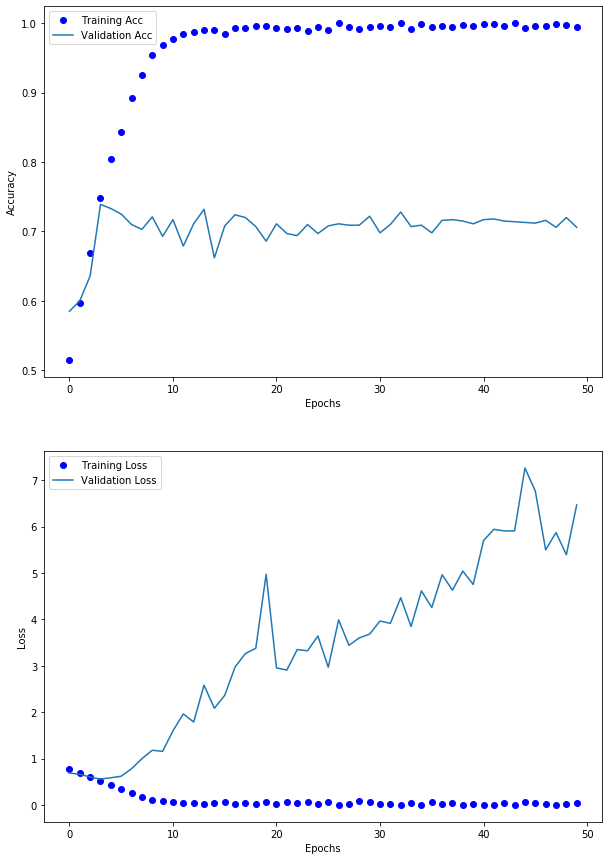

In [46]:
plot_history()

### Result
There is an overfitting problem. As the accuracy of the model on training data reached 100%, the model's accuracy on the validation data (new unseen data) did not increase. Image Augmentation might be useful in such scenario

### <section id='section7'>Image Augmentation</section>

In [70]:
train_gen = ImageDataGenerator(rescale=1./255,
      rotation_range=40, # a range to randomly rotate pictures 0-180
      width_shift_range=0.2, # fractional number. translate pictures vertical and horizontally
      height_shift_range=0.2,
      shear_range=0.2, #shearing transformations which slants the shape of an image
      zoom_range=0.2, # # for zoomed in images
      horizontal_flip=True, # flipping half of the image horizontally
      fill_mode='nearest') # filling in new pixel generated due to rotation or a shift

train_generator = train_gen.flow_from_directory(train_dir, # source directory of training images
                                               target_size=(150,150), # resize images to 150 by 150
                                               batch_size=20,
                                               class_mode='binary')
validation_generator = test_gen.flow_from_directory(validation_dir,
                                             target_size=(150,150),
                                             batch_size=20,
                                             class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Adding Callback

In [71]:
# A way to stop training the model when reaching a certain accuracy
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):# stopping after the epoch end
        if(logs.get('accuracy')>0.99): # sometimes change accuracy to acc
            print('\nAccuracy Reached')
            self.model.stop_training = True

# initiate object
callbacks = myCallback()

# this can then be passed when fitting the model as an arugment callbacks=[callbacks]

### <section id='section8'>Training with Image Augmentation</section>

In [72]:
model = tf.keras.Sequential([
    # first Convolutional Layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)), # input_shape as recised in the generator
    tf.keras.layers.MaxPooling2D(2,2), # using max pooling to take the brightest pixel for each 2x2 matrix of pixels
    # Second Convolutional layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Third CNN Layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the input
    tf.keras.layers.Flatten(),
    # Dense Neural Network
    tf.keras.layers.Dense(256, activation='relu'),
    # Output layer
    tf.keras.layers.Dense(1, activation='sigmoid') # even though it's 2 classes, 1 unit can be passed if using sigmoid for activation
    
])

# View the model layers and outputs
model.summary()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 36992)            

In [73]:
# compile model as we have two classes, binary_crossentropy can be used

model.compile(optimizer='RMSprop',# using RMSprop
             loss='binary_crossentropy',
             metrics='accuracy')

In [74]:
history = model.fit(train_generator,
                   validation_data=validation_generator,
                   steps_per_epoch=100, # Total training images is 2000. so number of images = batch_size(20)*steps(100)
                   epochs=130)

Epoch 1/130
100/100 [==============================] - 72s 723ms/step - loss: 0.8438 - accuracy: 0.5195 - val_loss: 0.6759 - val_accuracy: 0.5550
Epoch 2/130
100/100 [==============================] - 104s 1s/step - loss: 0.7893 - accuracy: 0.5420 - val_loss: 0.6636 - val_accuracy: 0.6330
Epoch 3/130
100/100 [==============================] - 110s 1s/step - loss: 0.7117 - accuracy: 0.5850 - val_loss: 0.6277 - val_accuracy: 0.6300
Epoch 4/130
100/100 [==============================] - 99s 990ms/step - loss: 0.6557 - accuracy: 0.6270 - val_loss: 0.6476 - val_accuracy: 0.6110
Epoch 5/130
100/100 [==============================] - 123s 1s/step - loss: 0.6368 - accuracy: 0.6395 - val_loss: 0.6083 - val_accuracy: 0.6660
Epoch 6/130
100/100 [==============================] - 132s 1s/step - loss: 0.6187 - accuracy: 0.6655 - val_loss: 0.5980 - val_accuracy: 0.6540
Epoch 7/130
100/100 [==============================] - 184s 2s/step - loss: 0.6172 - accuracy: 0.6630 - val_loss: 0.5610 - val_accur

### <section id='section9'>After Image Augmentation Results</section>

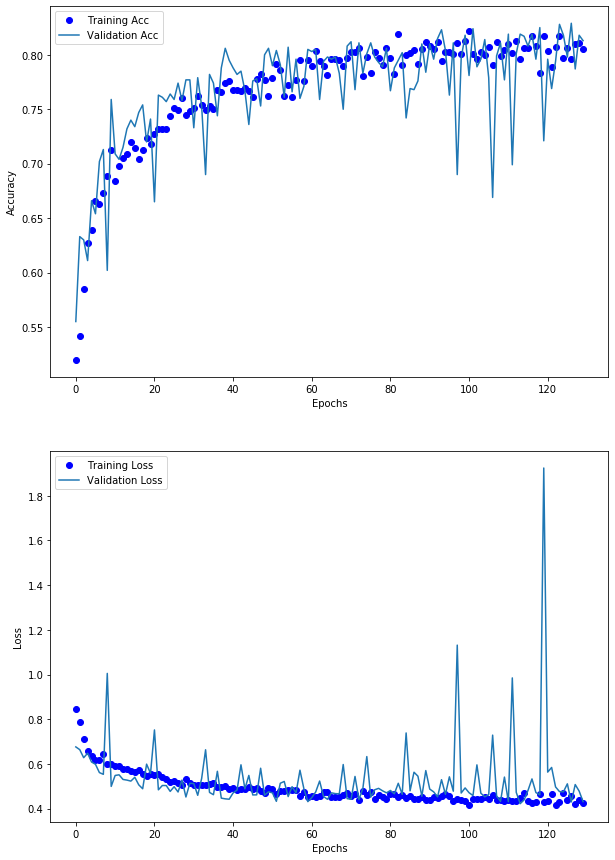

In [75]:
plot_history()